#### <font color = 'blue'>Before we start </font>


Fast fourier transform(FFT) is hailed as a one of the most important algorithm of the twenty first century as it lies at the heart of the most of the signal processing tasks performed in electronics. Discrete fourier tansform is a precursor of FFT but less efficient. Even for DFTs, there are many efficient version of algorithm online and inbuilt in many softwares(eg, scipy, matlab, mathematica, etc). Here we just try to dig into the fundamental mathematical result upon which DFT algorithm is based upon and show how it works at a very basic level. There are conditions when DFT algorithm fails but we won't be discussing them here. This tutorial is focused only on mathematical overview and how the algorithm is built based upon this mathematical framework, including examples which will demonstrate how DFT algorithm works practically. For readers interested to explore further, there are tons of resources online and many signal processing books also explain them in good details. 

### Section 1: <font color = 'magenta'>Brief mathematical overview of discrete fourier transform(DFT)</font>

Discrete fourier transform is a discretized form of Fourier transform which itself originates from Fourier series analysis. In fourier series analysis any discontinuous function satisfying Dirichlet's conditions can be approximated by complex fourier series as:

$$ \Large f(t) = \sum_{n=-\infty}^{\infty} C_{n}  exp(i \omega_{n}t) \tag{1} $$

where Fourier coefficient $C_{n}$ and frequency $\omega_{N}$ are given by:

$$\Large C_{n} = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} f(u) exp\left(-i \omega_{n} u\right) du$$
$$\Large \omega_{n} = \frac{2\pi n}{T} $$

For a scenario where $T\rightarrow \infty$, frequency spectrum $\omega_{n}$ becomes continuous and substituting fourier coefficient in above fourier series we get fourier integral

$$\Large F(\omega) = C \int_{-\infty}^{\infty} f(t) exp\left(-i \omega_{n} t\right) dt  \tag{2}$$

where coefficient C will depend on the timeperiod chosen. This integral represents <font color = 'red'>Fourier transfrom</font> of a function $f(t)$. This is where all the signal processing journey begins from. We have some timeseries function $f(t)$ and want to analyze its phase and frequency then we use Fourier transfrom. As you can see, this integral takes function of time - f(t) and gives function in frequency $F(\omega)$. <font color = 'red'>So, it helps us to extract frequency domain information by giving time domain input.</font>     

**Time signal as input $\Rightarrow$ Fourier Transform $\Rightarrow$ Phase & frequency information as output of given signal**

This power of fourier transform to feed time signal as input, which most of the signal in electronics world are, and get information about its phase and frequency makes it the single most important algorithm of the modern world. 

<font color = 'blue'>Where the heck does DFT come from ?</font>

Fourirer transfrom equation is for a case where the function is continuous and extends for huge amount of time(almost infinite). However, if we have a function(e.g. electrical signals) that appears for a very small amount of time and can be sampled for 'N' number of times we can use a discrete form of the above fourier integral and this discretized version of fourier transfrom for function measured at small time interval is what DFT is. So, for a function/signal measured at certain interval of time(say T) and recorded N number of times we could write above fourier integral as:

$$\Large F(\omega) = f(0) e^{-i \omega 0} + f(1) e^{-i \omega 1T} + f(2) e^{-i \omega 2T} + .......+ f(N-1) e^{-i \omega (N-1)T} $$
$$\Large F(\omega) = \sum_{k=0}^{N-1} f(k)e^{-i \omega kT} \tag{3}$$

You can understand this as we are measuring some electronic signal such as cell phone signal at time stamp of t = 0, t = 1,.... t= N-1 secs at discrete timeperiods 0T, 1T, 2T,.....,(N-1)T. 

If the function(signal) we are measuring is periodic and comes at different frequencies we are measuring the function at different frequencies. For a signal with timeperiod T and measured N number of times the highest frequency with which we are measuring the function(signal) is $\frac{1}{NT}$. Remember $freq = \frac{1}{time}$. This is also called the fundamental frequency. So, we will have various frequency of measurements if the same signal is coming at different frequencies. 
$$\Large \omega_{n} = 0,   \left(\frac{2\pi}{NT}\right)1,   \left(\frac{2\pi}{NT}\right)2,    \left(\frac{2\pi}{NT}\right)3,.........,\left(\frac{2\pi}{NT}\right)(N-1) \;\;\;\;\;\;\; where\;\; n = 0, 1, ....., (N-1)$$

Here $\large \omega$ represents angular frequency given by general expression $\large \omega = \frac{2\pi}{T}$

Using this in equation 3 and substituting  '$\large \omega_{n}$' we get a general expression for discrete fourier transfrom given by:

$$\Large F(n) = \sum_{k=0}^{N-1}  f(k)e^{\huge(\frac{-i 2\pi n kT}{NT}\huge)} \;\;\;\;\;\;\; where\;\; n = 0, 1, 2,.....N-1 $$
(Cancelling T from numerator and denominator)

This expression can be written in <font color = 'red'>more popular form of DFT expression</font> below 

$$\Large F(n) = \sum_{k=0}^{N-1} f(k)e^{\huge(\frac{-i 2\pi nk}{N}\huge)} ; \;\;\;\;\;\;\;\;\; n = 0, 1, 2,.....N-1\tag{4} $$


Let us use $e^{\huge( \frac{-i 2 \pi}{N}\huge)} = W$, for convenience. Above expression simplifies to the form

$$\Large F(n) =  \sum_{k=0}^{N-1}   \Large[f(k){W^{n}}\Large]^{k}   \tag{5}$$

For n = 0, $W^{0} = 1$ and above series expansion becomes

$$\Large F(0) = \sum_{k=0}^{N-1} f(k) =  f(0) + f(1) + f(2) + f(3) +  .....+ f(N-1)$$

For n = 1, $W^{n} = W$,

$$\Large F(1) = \sum_{k=0}^{N-1} f(k)W^{k} =  f(0) + f(1)W + f(2)W^{2} + f(3)W^{4}.....+ f(N-1)W^{N-1}$$

For n = 2, $W^{n} = W^{2}$,

$$\Large F(2) = \sum_{k=0}^{N-1} f(k)\Big(W^{2}\Big)^{k} =  f(0) + f(1)W^{2} + f(2)W^{4} + f(3)W^{6}.....+ f(N-1)W^{2N-2}$$
.
.
.
.

Continuing, for n = N-1, i.e. $W^{n} = W^{N-1}$

$$\Large F(N - 1) = \sum_{k=0}^{N-1} f(k)\Big(W^{N-1}\Big)^{k} =  f(0) + f(1)W^{N-1} + f(2)W^{2N-2} + f(3)W^{3N - 3}.....+ f(N-1)\Big(W^{N-1}\Big)^{N-1}$$

Remember, these terms F(0), F(1), F(2),......., F(N-1) will represent amplitudes when normalized by dividing by the total number of terms 'N'. And in our signal analysis whichever amplitudes are greatest will be the dominant term giving us the dominant frequencies($\omega_{n}$) given by 'n' value. We can write above DFT series expansion in matrix form as:

$$
 \begin{bmatrix} F(0)\\
F(1)\\
F(2)\\
.\\
.\\
.\\
F(N-1)
\end{bmatrix} = 


 \begin{bmatrix} 
1 & 1  & 1  & 1  & .......... 1\\
1 & W & W^{2}&  w^{3} & .....W^{N-1}\\
1 & W^{2}&  W^{4}&  W^{6}& .....W^{2N - 2}\\
& .&. & .& .\\
& .&. &. & .\\
& .&. &. & .\\
1 & W^{N-1}&  W^{2N - 2}&  W^{3N - 3}& .....\Big(W^{N - 1}\Big)^{N-1}\\\end{bmatrix} 

 \begin{bmatrix}
f(0)\\
f(1)\\
f(2)\\
.\\
.\\
.\\
f(N-1)
\end{bmatrix} 
\tag{6}
$$
$$ F\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; W \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;f$$

If we observe above matrix(W) in the middle it is a symmetric matrix. Due to its symmetric nature when we analyze a signal, DFT algorithm gives symmetrical spectrum of frequencies so we can only take half of the spectrum as the other half is simply a complex conjugate values or a mirror image of the first half. This nature of symmetry allows DFT algorithm to be optimized and fast fourier transform(FFT) algorithm exploits this property to optimize the algorithm. However, we won't discuss FFT here. Now, lets put all this math into work and see with some examples how DFT can decode any function/signal into frequencies of its constituent component signals.

### Section 2:  <font color = 'magenta'>Demonstration of DFT Algorithm based on above theory</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math

Let's take a test function and see above mathematical theory in action. Any wave/signal can, in general, be represented by a function below. 

$$ \mathbf{f(t) = A sin(\omega t) \;\;\;\;\;\;\;\;\;\;\; where \;\;         \omega = 2\pi f}$$

where 'A' represents amplitude, '$\omega$' represents angular frequency. 'f' is just frequency. The fact that we use angular frequency comes from the mathematics because it is convenient to use polar co-ordinate system to represent complex numbers and DFT series has complex term $e^{i\omega t}$ in it. Don't get confused one can be converted to other using above relation. 

Take a test function 
$$ \mathbf{f(x) = 5sin(2\pi1t) + 0.5sin(2\pi 2t) + 3sin(2\pi3t)}$$

Lets us suppose we have some kind of electrical signal represented by above function which graphically looks as shown below. 

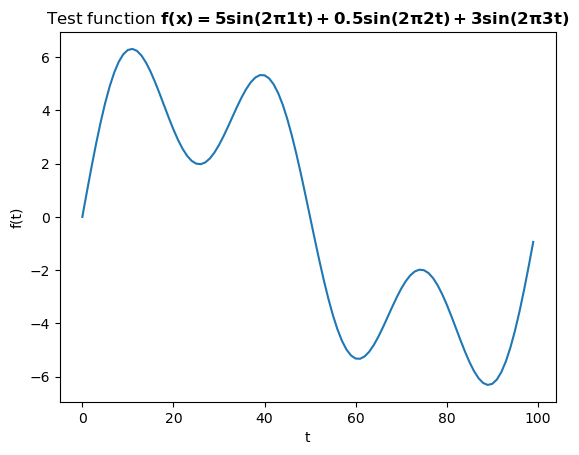

In [3]:
# Making a graph of above function

t = np.arange(100);
f = np.arange(100);
N = len(f)                       # Total number of samples/data points.

# If we are only measuring at one single instant we would not include 'N' in equation below. But when we are measing signals we 
# try to sample it huge number of times so that we can get as much information about the incoming signal. 

f_t = 5*np.sin(2*np.pi*(1/N)*t) + 0.5*np.sin(2*np.pi*(2/N)*t) + 3*np.sin(2*np.pi*(3/N)*t)
func_t = Matrix(f_t)
plt.plot(t,f_t)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Test function $\mathbf{f(x) = 5sin(2\pi1t) + 0.5sin(2\pi2t) + 3sin(2\pi3t)}$')
plt.show()

For the sake of convenience and visualization I will take the same function above and do the calculation of algorithm matrices above for N = 7 points instead of N = 100(or any other numbers) points because its not convenient and easy to visualize a matrix of shape '100 $\times$ 100' inside the cell of this jupyter notebook. You can consider changing value '7' in 'time_t' and 'freq_f' variables below to any other numbers(eg, 50, 100, etc) and see if the algorithm can still extract the frequency and amplitude of this function/signal. Only inconvenience would be that such a huge size of matrix is difficult to fit in the cell. Or, just comment the line which displays the matrix and rest should be fine.

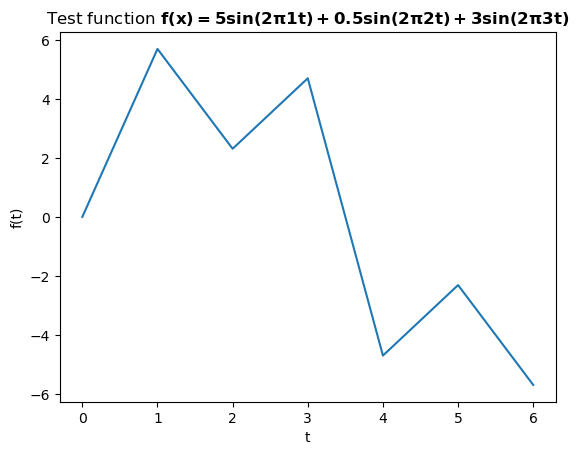

In [5]:
# Plotting same function but with less number of points or time stamps taken. The reason graph will not look smooth is beacause 
# now I have plotted it with very few number of points. But the nature can still be seen to convince us its same function.

time_t = np.arange(7);
freq_f = np.arange(7);
N = len(freq_f)                       # Total number of samples/data points.
function__f = 5*np.sin(2*np.pi*(1/N)*time_t) + 0.5*np.sin(2*np.pi*(2/N)*time_t) + 3*np.sin(2*np.pi*(3/N)*time_t)
func_t = Matrix(function__f)          # Keeping the functional values in matrix form.
plt.plot(time_t,function__f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Test function $\mathbf{f(x) = 5sin(2\pi1t) + 0.5sin(2\pi2t) + 3sin(2\pi3t)}$')
plt.show()

In the DFT series equation(eqn 4) above we have product of 'n' and 'k' in the exponential term. 't_matrix' and 'f_matrix' variables represent 'k' and 'n' respectively. Then we can calculate 
$$ e^{\huge(\frac{-i 2\pi nk}{N} \huge)} $$

and thiw will give us the matrix(W) in eqn 6. It is also called DFT kernel function. 

In [6]:
n_times_k = freq_f*time_t.reshape(len(time_t),1) 
exp_func = np.round(np.exp(-1j*2*np.pi*(1/N)*n_times_k), 3)   

# This is in essence calculating F(0), F(1), etc, represented by the matrix on the left hand side in eqn 6, by multiplying 
# DFT kernel array 'exp_func' and functional values array 'function__f'.

dft_func = np.dot(exp_func, function__f)                  

In [7]:
# Let us visualize our DFT kernel matrix below. Notice these are complex numbers. Notice how first row and first column are 
# just 1 as we see in the discussion of DFT algorithm above. All other numbers are in the form a + ib where a is real part
# and b is imaginary part. 

DFT_kernel = Matrix(exp_func)
print('\n DFT kernel matrix times function matrix. \n ')
DFT_kernel


 DFT kernel matrix times function matrix. 
 


Matrix([
[1.0,              1.0,              1.0,              1.0,              1.0,              1.0,              1.0],
[1.0,  0.623 - 0.782*I, -0.223 - 0.975*I, -0.901 - 0.434*I, -0.901 + 0.434*I, -0.223 + 0.975*I,  0.623 + 0.782*I],
[1.0, -0.223 - 0.975*I, -0.901 + 0.434*I,  0.623 + 0.782*I,  0.623 - 0.782*I, -0.901 - 0.434*I, -0.223 + 0.975*I],
[1.0, -0.901 - 0.434*I,  0.623 + 0.782*I, -0.223 - 0.975*I, -0.223 + 0.975*I,  0.623 - 0.782*I, -0.901 + 0.434*I],
[1.0, -0.901 + 0.434*I,  0.623 - 0.782*I, -0.223 + 0.975*I, -0.223 - 0.975*I,  0.623 + 0.782*I, -0.901 - 0.434*I],
[1.0, -0.223 + 0.975*I, -0.901 - 0.434*I,  0.623 - 0.782*I,  0.623 + 0.782*I, -0.901 + 0.434*I, -0.223 - 0.975*I],
[1.0,  0.623 + 0.782*I, -0.223 + 0.975*I, -0.901 + 0.434*I, -0.901 - 0.434*I, -0.223 - 0.975*I,  0.623 - 0.782*I]])

In [9]:
# Similarly, 'f' matrix of functional values  is

print('\n Matrix representing value of given function at each instant of time \n')
func_t


 Matrix representing value of given function at each instant of time 



Matrix([
[                0],
[ 5.69827258578374],
[ 2.31220324394625],
[ 4.70328669089925],
[-4.70328669089925],
[-2.31220324394625],
[-5.69827258578373]])

In [12]:
# Now multiplying these two matrices should give us another matrix 'F'. Notice how these values are complex 
# numbers as expected.

product_matrix = Matrix(dft_func)
print("\n Product of kernel matrix 'W' and function matrix 'f' giving us 'F' matrix. \n")
product_matrix


 Product of kernel matrix 'W' and function matrix 'f' giving us 'F' matrix. 



Matrix([
[                      1.77635683940025e-15],
[                       -17.5033474975615*I],
[ 1.77635683940025e-15 - 1.74869874196651*I],
[-1.77635683940025e-15 - 10.5012237781819*I],
[-1.77635683940025e-15 + 10.5012237781819*I],
[ 1.77635683940025e-15 + 1.74869874196651*I],
[-4.44089209850063e-16 + 17.5033474975615*I]])

All values we get for F(0), F(1), F(2), etc are complex numbers in the form a + ib. Amplitude is mathematically defined as: 

$$ amp = \frac{\sqrt{Re(F(k))^{2} + Im(F(k))^{2} }}{N} $$

For a complex number $z = a + ib$,  $abs()$ function in python calculates:

$$ abs(z) =  \sqrt{a^{2} + b^{2}}$$

In [13]:
# Calculating amplitudes from F(0), F(1), etc. You might be wondering why we divide by N/2 instead of N. Remember the 
# kernel matrix is symmetric. Due to the symmetric nature effective number is just N/2. Also notice that the matrix 
# elements are identical if we divide the whole matrix into half. For instance 2nd element is identical to 7th element, 3rd to 
# 6th and so on. 

amp = abs(dft_func)/(N/2)  
amp_matrix = Matrix(amp)
print('\n Calculated amplitudes of the given signal for several frequencies \n')
amp_matrix


 Calculated amplitudes of the given signal for several frequencies 



Matrix([
[5.07530525542929e-16],
[    5.00095642787471],
[   0.499628211990433],
[    3.00034965090911],
[    3.00034965090911],
[   0.499628211990433],
[    5.00095642787471]])

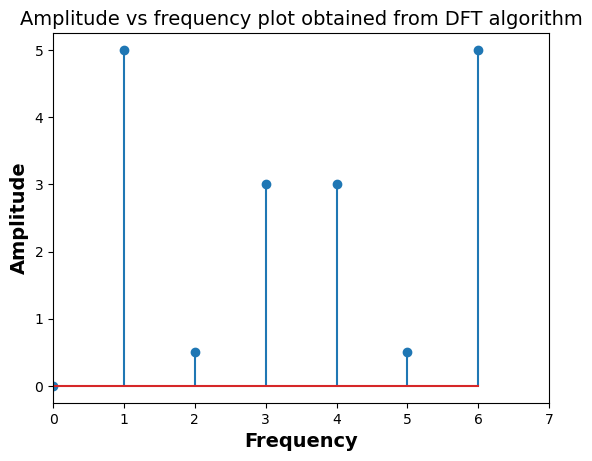

In [14]:
# Making a stem plot of amplitudes vs frequencies. 
plt.stem(time_t, amp)
plt.xlim(0,len(time_t))
plt.xlabel('Frequency', fontweight = 'bold', fontsize = 14)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Amplitude vs frequency plot obtained from DFT algorithm', fontsize = 14)
plt.show()

You can see finally we recovered both amplitude and frequency by using the DFT algorithm. Also, notice the spectrum is identical on both side if divided from mid-point. This is due to the symmetric nature of the DFT kernel matrix. So, in practice we can only use half of the spectrum plot and ignore other half.  These amplitudes and frequencies are exactly the same as defined in the function. Input function had frequencies 1, 2 and 3 and amplitudes 5, 0.5 and 3.

### Section 3: <font color = 'magenta'> Decomposing original function/signal into its constituents components</font>

Below we can graphically see original function/signal(red) and component functions/signals(blue). The component signals are plotted using the frequency and amplitude extracted from the DFT algorithm. So, original input signal is just a superposition of three component signals with given frequencies and amplitude. This clearly shows us how we can breakdown given function/signal into its component signals.  

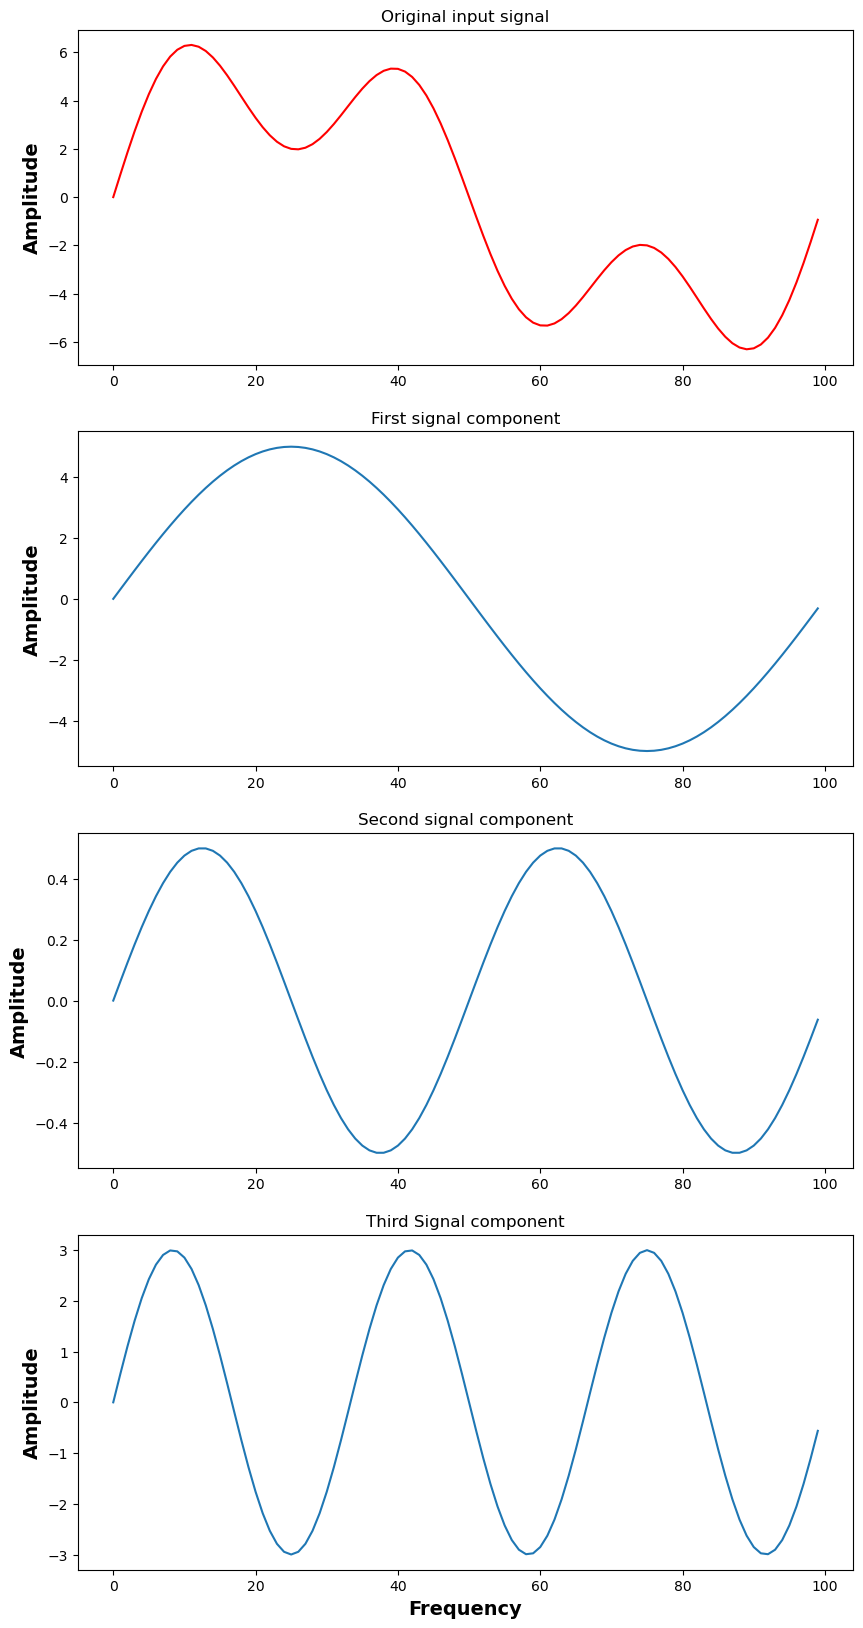

In [15]:
timestamps = np.arange(100);
total_N = len(timestamps)
original_signal = 5*np.sin(2*np.pi*(1/total_N)*timestamps) + 0.5*np.sin(2*np.pi*(2/total_N)*timestamps) + 3*np.sin(2*np.pi*(3/total_N)*timestamps)
signal_one = 5*np.sin(2*np.pi*(1/total_N)*timestamps)
signal_two = 0.5*np.sin(2*np.pi*(2/total_N)*timestamps)
signal_three = 3*np.sin(2*np.pi*(3/total_N)*timestamps)

plt.figure(figsize = (10, 20))
plt.subplot(411)
plt.plot(timestamps, original_signal, color = 'red')
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Original input signal')
plt.subplot(412)
plt.plot(timestamps, signal_one)
plt.ylabel('Amplitude' , fontweight = 'bold', fontsize = 14)
plt.title('First signal component')
plt.subplot(413)
plt.plot(timestamps, signal_two)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Second signal component')
plt.subplot(414)
plt.plot(timestamps, signal_three)
plt.xlabel('Frequency', fontweight = 'bold', fontsize = 14)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Third Signal component')
plt.show()

### Section 4: <font color = 'magenta'>Let's play with one more example using larger sampling size</font>

In this example we consider a function/signal represented by:
$$ \mathbf{ f(t) = 5sin(2\pi 1t) + sin(2\pi6t) + 0.5sin(2\pi12t)}$$

Lets us see if we can still extract frequency and amplitude of the individual signal components of this input function/signal using the DFT algorithm we used above. 

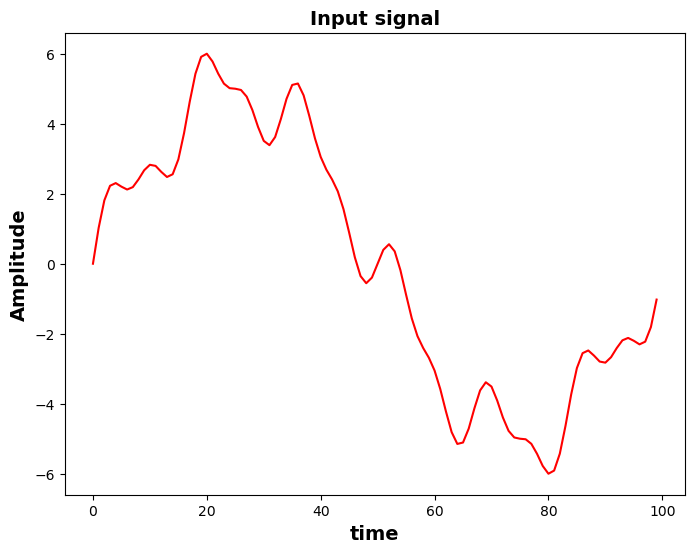

In [16]:
dt = np.arange(100)
no_of_freq = np.arange(100)
total_no_sample = len(dt)
input_function = 5*np.sin(2*np.pi*(1/total_no_sample)*dt) + np.sin(2*np.pi*(6/total_no_sample)*dt) + 0.5*np.sin(2*np.pi*(12/total_no_sample)*dt)
plt.figure(figsize = (8,6))
plt.plot(dt,input_function, 'r')
plt.xlabel('time', fontweight = 'bold', fontsize = 14)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Input signal', fontweight = 'bold', fontsize = 14)
plt.show()

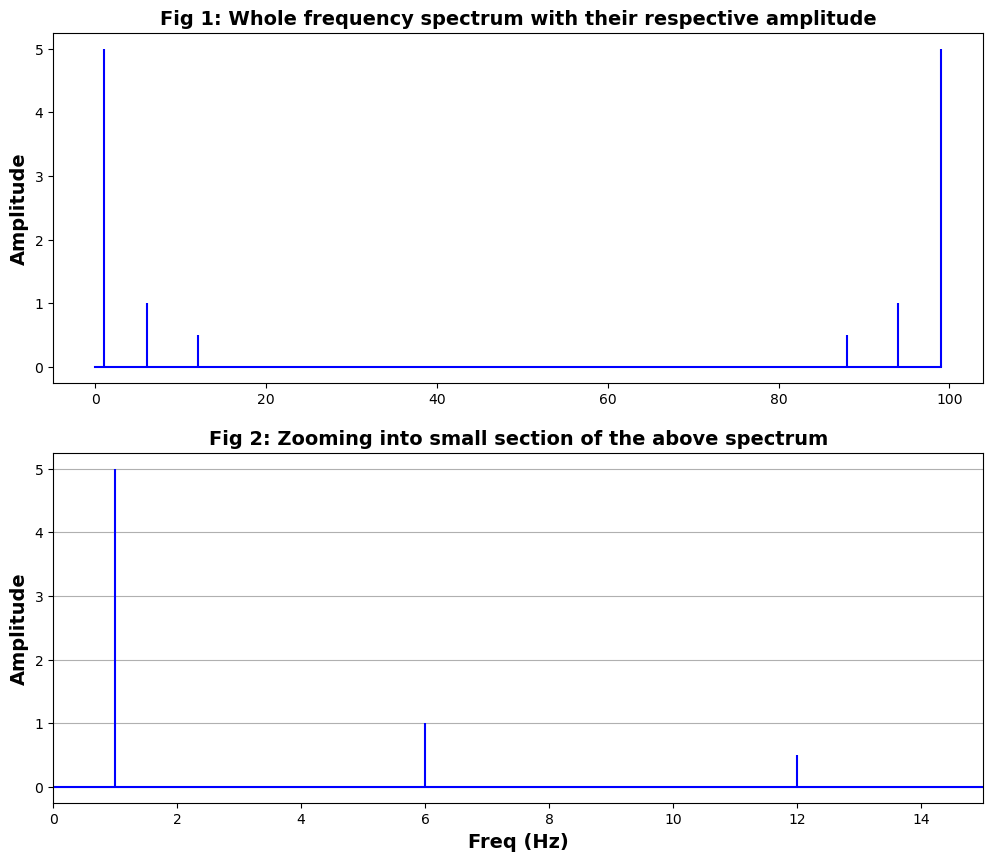

In [17]:
def DFT(f_of_x):

    """Function to calculate the discrete Fourier Transform of a 1D real-valued signal/function. We supply the functional values
    and this will calculate the amplitudes for that functional values."""
    
    signal_size = len(f_of_x)
    n = np.arange(signal_size)
    k = n.reshape((signal_size, 1))
    kernel_W = np.exp(-2j*np.pi*k*n/signal_size)
    F_matrix = np.dot(kernel_W, f_of_x)
    amplitude_values = np.round(abs(F_matrix)/(signal_size/2), 3)
    return amplitude_values


Y = DFT(input_function)   # Amplitudes calculated by the above DFT algorithmic function.
X = dt                    # Same times stamples we have taken


# Visualizing the extraction of frequency and amplitude of the given input signal.

plt.figure(figsize = (12, 10))
plt.subplot(211)
plt.stem(X, Y, 'b', markerfmt = ' ', basefmt = '-b')
plt.ylabel('Amplitude',  fontweight = 'bold', fontsize = 14)
plt.title('Fig 1: Whole frequency spectrum with their respective amplitude', fontweight = 'bold', fontsize = 14)
plt.subplot(212)
plt.stem(X, Y, 'b', markerfmt = ' ', basefmt = '-b')
plt.xlabel('Freq (Hz)' , fontweight = 'bold', fontsize = 14)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.grid(axis = 'y', which='both')
plt.xlim(0,15)
plt.title('Fig 2: Zooming into small section of the above spectrum', fontweight = 'bold', fontsize = 14)
plt.show()
    

#### <font color = 'green'>Hurray! We got the expected amplitude(5,1,0.5) and frequency(1,6,12) of the component signals as seen in the second figure above.</font>
Below we decompose input signal(red) into its component signals(blue). First plot in <font color = 'red'>red</font> is superposition of three succeeding plots in <font color = 'blue'>blue</font>.

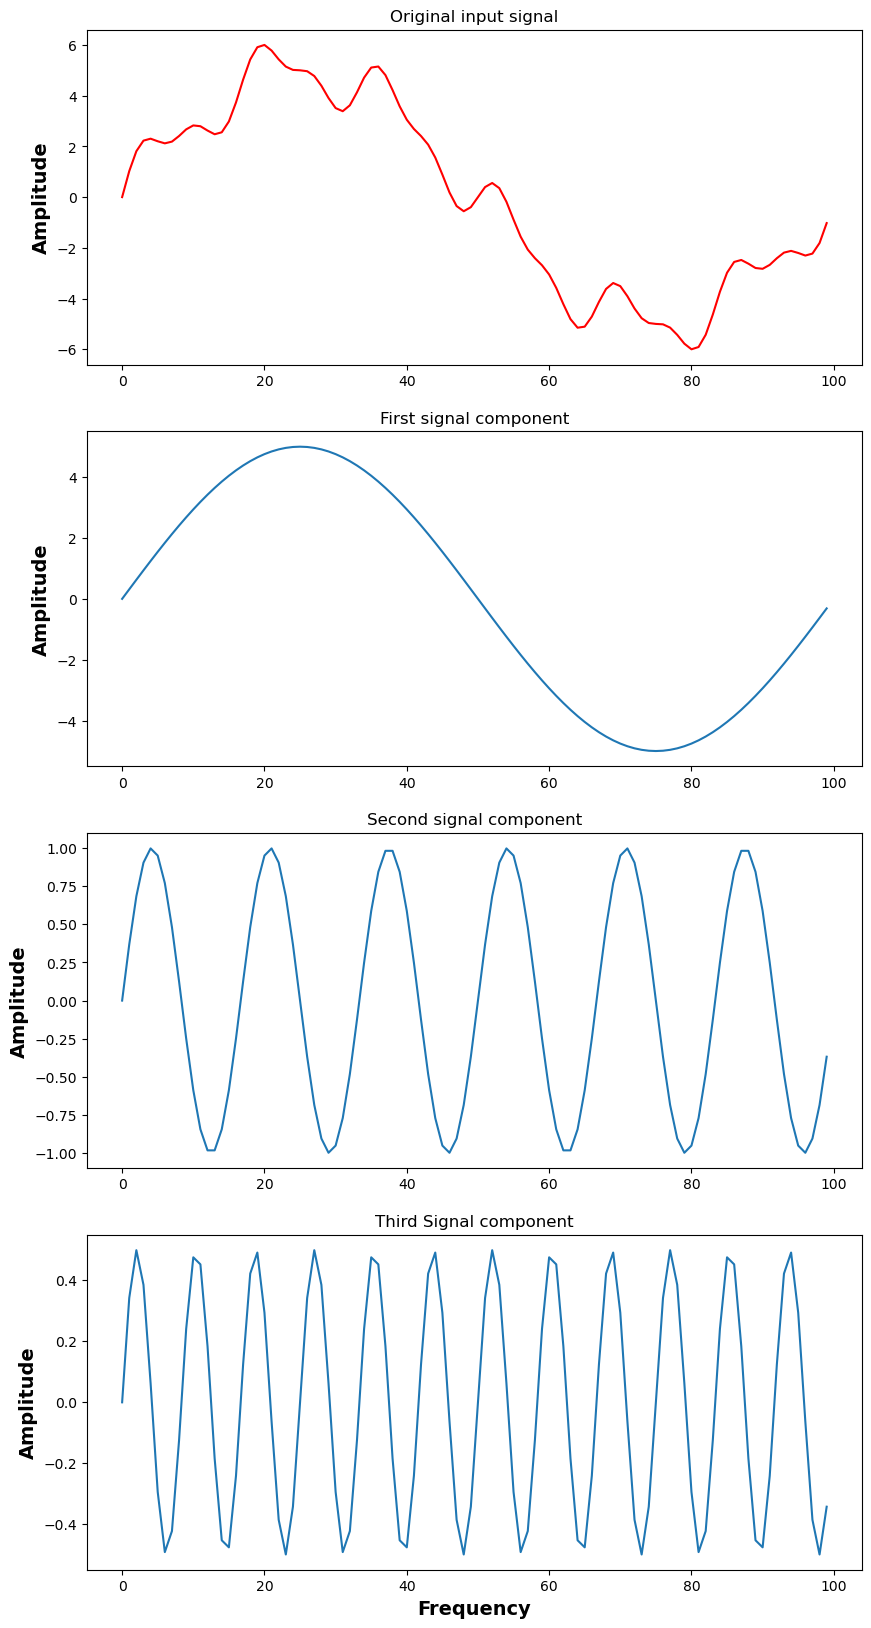

In [18]:
first_component = 5*np.sin(2*np.pi*(1/total_no_sample)*dt)
second_component = np.sin(2*np.pi*(6/total_no_sample)*dt)
third_component = 0.5*np.sin(2*np.pi*(12/total_no_sample)*dt)

plt.figure(figsize = (10, 20))
plt.subplot(411)
plt.plot(dt, input_function, color = 'red')
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Original input signal')
plt.subplot(412)
plt.plot(dt, first_component)
plt.ylabel('Amplitude' , fontweight = 'bold', fontsize = 14)
plt.title('First signal component')
plt.subplot(413)
plt.plot(dt, second_component)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Second signal component')
plt.subplot(414)
plt.plot(dt, third_component)
plt.xlabel('Frequency', fontweight = 'bold', fontsize = 14)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 14)
plt.title('Third Signal component')
plt.show()

References: Following sources were consulted during the preparation of this lesson.

1. https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf
2. https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html
3. "Mathematical Methods for Physics and Engineering", K. F. Riley, M. P. Hobson, S. J. Bence, University of Cambridge, 2006